In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [12]:
fault_events = pd.read_csv("../big_g_express-domo-arigato-mr-robot/data/J1939Faults.csv")

/home/evgeniya/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
fault_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187335 entries, 0 to 1187334
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   RecordID               1187335 non-null  int64  
 1   ESS_Id                 1187335 non-null  int64  
 2   EventTimeStamp         1187335 non-null  object 
 3   eventDescription       1126490 non-null  object 
 4   actionDescription      0 non-null        float64
 5   ecuSoftwareVersion     891285 non-null   object 
 6   ecuSerialNumber        844318 non-null   object 
 7   ecuModel               1122577 non-null  object 
 8   ecuMake                1122577 non-null  object 
 9   ecuSource              1187335 non-null  int64  
 10  spn                    1187335 non-null  int64  
 11  fmi                    1187335 non-null  int64  
 12  active                 1187335 non-null  bool   
 13  activeTransitionCount  1187335 non-null  int64  
 14  faultValue        

In [23]:
for col_name in fault_events.columns:
    if fault_events[col_name].dtypes == 'object':
        unique_cat = len(fault_events[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'EventTimeStamp' has 1050909 unique categories
Feature 'eventDescription' has 744 unique categories
Feature 'ecuSoftwareVersion' has 1899 unique categories
Feature 'ecuSerialNumber' has 1990 unique categories
Feature 'ecuModel' has 30 unique categories
Feature 'ecuMake' has 23 unique categories
Feature 'EquipmentID' has 1927 unique categories
Feature 'LocationTimeStamp' has 1036006 unique categories


In [21]:
fault_events.groupby('ecuModel')['spn'].size()
#sns.barplot('')

ecuModel
0USA10_13_0405_2237A         1
0USA13_13_0415_2238A      7252
202.35.0                     1
20412511P07                  4
6L u13D0890000000           28
6U13D13                      4
6X1u10D1500000000       216230
6X1u13D1500000000       203685
6X1u17D1500000000        14499
6X1u20D1500000000            6
CE                         297
CECU3-NAMUX3                20
CECU3B-NAMUX4           277919
E0031                        4
EC60-adv                 48816
EC80ESP                  22202
EC80ESP AM000036             7
EC80ESP AM000038             2
EC80ESP+                    42
EEO-xxF112C               8131
FAOM-xx810S-EC3           4464
Gen 4 Boot Loader           21
MX                       16362
MX16U13D13                3629
MX16U15D13                 391
Y044053                      4
Y049568                      5
________Y043718              2
unknown                 298549
Name: spn, dtype: int64

In [11]:
fault_events.shape

(1187335, 20)

In [12]:
fault_events.isnull().sum()

RecordID                       0
ESS_Id                         0
EventTimeStamp                 0
eventDescription           60845
actionDescription        1187335
ecuSoftwareVersion        296050
ecuSerialNumber           343017
ecuModel                   64758
ecuMake                    64758
ecuSource                      0
spn                            0
fmi                            0
active                         0
activeTransitionCount          0
faultValue               1187335
EquipmentID                    0
MCTNumber                      0
Latitude                       0
Longitude                      0
LocationTimeStamp              0
dtype: int64

In [28]:
fault_events['spn'].value_counts

<bound method IndexOpsMixin.value_counts of 0           111
1           629
2          1807
3          1807
4          4364
           ... 
1187330    1761
1187331    1569
1187332    3216
1187333     111
1187334     111
Name: spn, Length: 1187335, dtype: int64>

<AxesSubplot:>

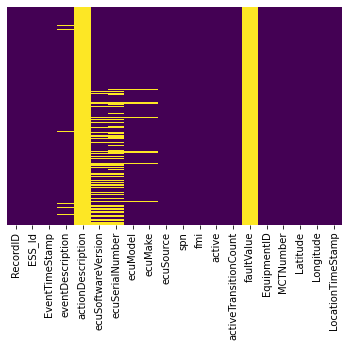

In [14]:
sns.heatmap(fault_events.isnull(), yticklabels=False, cbar =False, cmap = 'viridis')

In [3]:
veh_diagnostics = pd.read_csv("../big_g_express-domo-arigato-mr-robot/data/VehicleDiagnosticOnboardData.csv")

In [53]:
veh_diagnostics.shape

(12821626, 4)

In [54]:
veh_diagnostics.head()

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1


In [55]:
veh_diagnostics[veh_diagnostics['FaultId'] == 4]

,Id,Name,Value,FaultId
24,25,IgnStatus,True,4
25,26,LampStatus,1279,4


In [56]:
veh_diagnostics[veh_diagnostics['FaultId'] == 1]

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1
5,6,AcceleratorPedal,0,1
6,7,IntakeManifoldTemperature,78.8,1
7,8,FuelRate,0,1
8,9,FuelLtd,12300.907429328,1
9,10,EngineRpm,0,1


In [57]:
veh_diagnostics['Name'].unique()

array(['IgnStatus', 'EngineOilPressure', 'EngineOilTemperature',
       'TurboBoostPressure', 'EngineLoad', 'AcceleratorPedal',
       'IntakeManifoldTemperature', 'FuelRate', 'FuelLtd', 'EngineRpm',
       'LampStatus', 'BarometricPressure', 'FuelLevel', 'Speed',
       'EngineTimeLtd', 'CruiseControlSetSpeed', 'CruiseControlActive',
       'EngineCoolantTemperature', 'ParkingBrake',
       'SwitchedBatteryVoltage', 'DistanceLtd', 'Throttle',
       'FuelTemperature', 'ServiceDistance'], dtype=object)

In [58]:
veh_diagnostics.groupby('Name')['Value'].size().sort_values()

Name
ServiceDistance                  215
SwitchedBatteryVoltage        114059
FuelTemperature               299110
ParkingBrake                  399972
Throttle                      420503
FuelLevel                     502795
AcceleratorPedal              531889
CruiseControlActive           574916
CruiseControlSetSpeed         576458
EngineTimeLtd                 581366
TurboBoostPressure            583351
EngineOilTemperature          583912
Speed                         583916
FuelLtd                       585195
FuelRate                      585237
EngineLoad                    585621
DistanceLtd                   585819
BarometricPressure            585976
EngineCoolantTemperature      586071
EngineOilPressure             586244
IntakeManifoldTemperature     586291
EngineRpm                     586921
IgnStatus                     608454
LampStatus                   1187335
Name: Value, dtype: int64

In [7]:
veh_diagnostics.dtypes

Id          int64
Name       object
Value      object
FaultId     int64
dtype: object

In [11]:
veh_diagnostics[veh_diagnostics['Name'] == 'FuelRate']

,Id,Name,Value,FaultId
7,8,FuelRate,0,1
33,34,FuelRate,4.583399,6
53,54,FuelRate,14.29175,7
78,79,FuelRate,13.72378,11
103,104,FuelRate,0,15
...,...,...,...,...
12821523,12863922,FuelRate,0,1248449
12821545,12863944,FuelRate,0.5151371,1248452
12821570,12863969,FuelRate,7.647805,1248455
12821592,12863991,FuelRate,8.995086,1248456


In [4]:
diagnostics_data = veh_diagnostics.pivot(
    index = 'FaultId', 
    columns = 'Name', 
    values = 'Value').reset_index().set_index('FaultId')
diagnostics_data

Name,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
FaultId,,,,,,,,,,,,,,,,,,,,,
1,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,0,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1248455,100,14.5,True,64.6226,423937.9,185,51,37.12,211.4937,1310.25,...,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1248456,0,14.355,True,66.48672,465925.4,186.8,62,41.18,212.8438,1340.75,...,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96


In [6]:
diagnostics_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187335 entries, 1 to 1248458
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   AcceleratorPedal           531889 non-null   object
 1   BarometricPressure         585976 non-null   object
 2   CruiseControlActive        574916 non-null   object
 3   CruiseControlSetSpeed      576458 non-null   object
 4   DistanceLtd                585819 non-null   object
 5   EngineCoolantTemperature   586071 non-null   object
 6   EngineLoad                 585621 non-null   object
 7   EngineOilPressure          586244 non-null   object
 8   EngineOilTemperature       583912 non-null   object
 9   EngineRpm                  586921 non-null   object
 10  EngineTimeLtd              581366 non-null   object
 11  FuelLevel                  502795 non-null   object
 12  FuelLtd                    585195 non-null   object
 13  FuelRate                   

In [37]:
fault_codes = pd.read_excel("../big_g_express-domo-arigato-mr-robot/data/Service Fault Codes_1_0_0_167.xlsx")

/home/evgeniya/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [42]:
fault_codes.head()

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,Y,111,167,Not Mapped,254,0,12,629,12,P0606,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...,Error internal to the ECM related to memory ha...
1,Y,112,167,Not Mapped,20,128,7,635,7,Not Mapped,Red,Stop / Shutdown,Engine Timing Actuator Driver Circuit - Mechan...,Mechanical failure in the engine timing actuat...
2,Y,113,167,Not Mapped,20,128,3,635,3,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,High signal voltage detected at the engine tim...
3,Y,114,167,Not Mapped,20,128,4,635,4,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,Low voltage detected at the engine timing actu...
4,Y,115,167,190,Not Mapped,Not Mapped,2,612,2,P0008,Red,Stop / Shutdown,Engine Magnetic Speed/Position Lost Both of Tw...,The ECM has detected that the primary and back...


In [30]:
 fault_events_columns=["FaultId",
"ESS_Id",
"EventTimeStamp",
"eventDescription",
"actionDescription",
"ecuSoftwareVersion",
"ecuSerialNumber",
"ecuModel",
"ecuMake",
"ecuSource",
"spn",
"fmi",
"active",
"activeTransitionCount",
"faultValue",
"EquipmentID",
"MCTNumber",
"Latitude",
"Longitude",
"LocationTimeStamp"] 

In [31]:
fault_events.columns=fault_events_columns
fault_events.head()


,FaultId,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000


In [32]:
fault_events.EventTimeStamp = pd.to_datetime(fault_events.EventTimeStamp, format = '%Y-%m-%d %H:%M:%S')

In [33]:
fault_events['day'] = fault_events['EventTimeStamp'].dt.day
fault_events['month'] = fault_events['EventTimeStamp'].dt.month
fault_events['Year'] = fault_events['EventTimeStamp'].dt.year

In [69]:
fault_events.head()

,FaultId,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,day,month,Year
0,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,21,2,2015
1,2,990360,2015-02-21 11:34:34,NaN,NaN,unknown,unknown,unknown,unknown,11,...,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,21,2,2015
2,3,990364,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,21,2,2015
3,4,990370,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,21,2,2015
4,5,990416,2015-02-21 11:39:41,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,...,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,21,2,2015


In [76]:
combo = pd.merge(fault_events, diagnostics_data, on = 'FaultId').set_index('FaultId')
combo.head()

,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
FaultId,,,,,,,,,,,,,,,,,,,,,
1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
2,990360,2015-02-21 11:34:34,NaN,NaN,unknown,unknown,unknown,unknown,11,629,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,990364,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,990370,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
5,990416,2015-02-21 11:39:41,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
combo.columns

Index(['ESS_Id', 'EventTimeStamp', 'eventDescription', 'actionDescription',
       'ecuSoftwareVersion', 'ecuSerialNumber', 'ecuModel', 'ecuMake',
       'ecuSource', 'spn', 'fmi', 'active', 'activeTransitionCount',
       'faultValue', 'EquipmentID', 'MCTNumber', 'Latitude', 'Longitude',
       'LocationTimeStamp', 'day', 'month', 'Year', 'AcceleratorPedal',
       'BarometricPressure', 'CruiseControlActive', 'CruiseControlSetSpeed',
       'DistanceLtd', 'EngineCoolantTemperature', 'EngineLoad',
       'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
       'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelRate', 'FuelTemperature',
       'IgnStatus', 'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'ServiceDistance', 'Speed', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure'],
      dtype='object')

In [80]:
combo['eventDescription'].str.contains('derate', case=False).value_counts()

False    1115563
True       10927
Name: eventDescription, dtype: int64

In [87]:
derated_to_check = combo[((combo['spn']==1569) & (combo['fmi']==31))| (combo['spn']==5246)]


In [96]:
derated_to_check.groupby(['spn','fmi'])['eventDescription'].size()

spn   fmi
1569  31     10927
5246  0        790
      14        22
      15       113
      16       171
      19        99
Name: eventDescription, dtype: int64

In [104]:
derated_to_check['eventDescription']

FaultId
41         Condition Exists Engine Protection Torque Derate
46                                                      NaN
250        Condition Exists Engine Protection Torque Derate
291        Condition Exists Engine Protection Torque Derate
307        Condition Exists Engine Protection Torque Derate
                                 ...                       
1247196    Condition Exists Engine Protection Torque Derate
1247319    Condition Exists Engine Protection Torque Derate
1247331    Condition Exists Engine Protection Torque Derate
1247854    Condition Exists Engine Protection Torque Derate
1248455    Condition Exists Engine Protection Torque Derate
Name: eventDescription, Length: 12122, dtype: object

In [103]:
derated_to_check['eventDescription'].nunique()

1

In [106]:
derated_to_check['EquipmentID']

FaultId
41         1721
46         1395
250        1721
291        1721
307        1721
           ... 
1247196    1855
1247319    1827
1247331    1827
1247854    1868
1248455    1994
Name: EquipmentID, Length: 12122, dtype: object

In [94]:
fault_codes.columns

Index(['Published in CES 14602', 'Cummins Fault Code', 'Revision', 'PID',
       'SID', 'MID', 'J1587 FMI', 'SPN', 'J1939 FMI', 'J2012 Pcode',
       'Lamp Color', 'Lamp Device', 'Cummins Description',
       'Algorithm Description'],
      dtype='object')

In [110]:
derated_tracks = fault_codes[(fault_codes['SPN']==1569) | (fault_codes['J1587 FMI']==31) |(fault_codes['J1587 FMI']==31) | (fault_codes['SPN']==5246)]

derated_tracks.head()

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
2518,Y,3712,167,Not Mapped,Not Mapped,Not Mapped,0,5246,0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
2520,Y,3714,167,Not Mapped,Not Mapped,Not Mapped,11,1569,31,Not Mapped,Amber,Warning,Engine Protection Torque Derate - Condition Ex...,NaN
2781,Y,4134,167,Not Mapped,Not Mapped,Not Mapped,0,5246,15,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement - Least Severe - Fault Code 371...
4338,Y,6254,167,Not Mapped,Not Mapped,Not Mapped,0,5246,16,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement Severit...,NaN
4339,Y,6255,167,Not Mapped,Not Mapped,Not Mapped,0,1569,15,Not Mapped,None,None,Engine Protection Torque Derate - Data Valid B...,NaN


In [53]:
fault_codes['Cummins Description'].str.contains('Derate').value_counts()

False    7113
True       11
Name: Cummins Description, dtype: int64

In [63]:
df = fault_codes[fault_codes['Cummins Description'].str.contains('derate', case=False)]
df[['Cummins Description']].head(25)

,Cummins Description
12,Intake Manifold 1 Pressure - Data Valid But Ab...
13,Intake Manifold 1 Pressure - Data Valid But Be...
14,Intake Manifold 3 Pressure - Data Valid But Ab...
15,Intake Manifold 3 Pressure - Data Valid But Be...
28,Engine Oil Rifle Pressure - Data Valid But Abo...
29,Engine Oil Rifle Pressure - Data Valid But Bel...
32,Engine Coolant Temperature - Data Valid But Ab...
56,Fuel Rack Actuator Driver Mechanically Stuck C...
76,Coolant Level - Data Valid But Below Normal Op...
99,Coolant Pressure - Data Valid But Below Normal...
